In [84]:
import pickle
import os
import pandas as pd
import numpy as np 
from tqdm import tqdm
from util import *

In [2]:
import matplotlib.pyplot as plt

In [3]:
### X
price_df = pd_setting(pd.read_csv("./data/features/price_df.csv"))
mu_df = pd_setting(pd.read_csv("./data/features/mu_df.csv"))
sigma_df = pd_setting(pd.read_csv("./data/features/sigma_df.csv"))

feat_date = list(price_df.index)

In [4]:
dff = pd_setting(pd.read_csv("./data/df_XY.csv"))

dfy = dff.loc[feat_date]
# extracting Y columns
Y_col = [x for x in dfy.columns if x[-2:]=='_Y']
dfy = dfy[Y_col]

In [5]:
dfy.head(1)

,TLT_Y,AGG_Y,Cash_Y,SPY_Y,EFA_Y,VWO_Y,GLD_Y,DBC_Y,EMB_Y
Date,,,,,,,,,
1990-12-20,1060.22,3509.748172,1559.667686,3400.033584,5499.752506,1861.6,752.832031,1394.786,3840.07261


In [6]:
path = "./RESULT/return_month_true"
res_ls = os.listdir(os.path.join(path))


In [7]:
result_all = []
for f_name in tqdm(res_ls):
    df = pd.DataFrame(pd.read_pickle("./RESULT/return_month_true/{}".format(f_name)))
    result_all.append(df)
result_table = pd.concat(result_all)

100%|██████████| 106/106 [00:00<00:00, 1847.96it/s]


In [29]:
# Date Month 
last_day = [x[1] for x in result_table['Date'].values]
first_day = [x[0] for x in result_table['Date'].values]

# reindexing by date
result_table.index = last_day
result_table = result_table.sort_index()
last_day = list(result_table.index)

In [32]:
# benchmark asset
spy_mu_month = [round(return_volatility(dfy[['SPY_Y']].loc[x[0]:x[1]])[0][0],4) for x in result_table['Date'].values]
spy_dict = {}
spy_dict['spy_mu_month'] = spy_mu_month


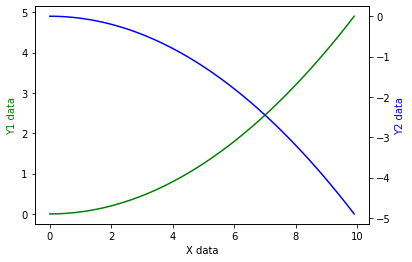

In [33]:
x = np.arange(0, 10, 0.1)
y1 = 0.05 * x**2
y2 = -1 *y1

fig, ax1 = plt.subplots()

ax2 = ax1.twinx()
ax1.plot(x, y1, 'g-')
ax2.plot(x, y2, 'b-')

ax1.set_xlabel('X data')
ax1.set_ylabel('Y1 data', color='g')
ax2.set_ylabel('Y2 data', color='b')

plt.show()

In [34]:
dfy.loc[first_day[0]:last_day[-1]].shape

(2305, 9)

In [35]:
result_table.shape

(106, 9)

In [36]:
# dfy.loc[first_day[0]:last_day[-1]].rolling(window=20).mean().reindex(last_day)

dfy_rolling = dfy.loc[first_day[0]:last_day[-1]].ewm(20).mean()
dfy_rolling.loc[dfy_rolling.index.intersection(last_day)]

,TLT_Y,AGG_Y,Cash_Y,SPY_Y,EFA_Y,VWO_Y,GLD_Y,DBC_Y,EMB_Y
Date,,,,,,,,,
2012-07-31,7449.421056,14507.549023,7966.199448,21367.099600,15605.447140,10540.179317,3012.150016,5485.066301,2755.792028
2012-08-31,7277.126839,14489.951681,7981.219747,21931.596422,16174.408655,10811.402311,3072.300715,5689.417018,2735.855545
2012-09-28,7176.440002,14518.912822,7995.966989,22469.984304,16697.096976,11075.234695,3223.727274,5790.224551,2698.650628
2012-10-31,7124.721938,14553.881660,8014.359325,22545.438036,16891.633468,11228.291704,3258.355069,5735.319564,2723.142626
2012-11-30,7217.763013,14590.365284,8032.152952,22224.829553,16922.476666,11222.922053,3253.661307,5681.670644,2672.004143
...,...,...,...,...,...,...,...,...,...
2020-12-31,11225.589107,18994.036190,9176.334113,67774.925447,29252.026915,16099.967972,3555.440703,2918.042455,1142.946090
2021-01-29,11027.503021,18979.546309,9180.094623,69855.981384,29995.859159,16914.618430,3541.953564,3066.471484,1107.716750
2021-02-26,10597.915266,18853.833499,9183.621816,71721.640733,30451.619404,17591.676384,3452.003753,3283.375075,1075.151946


In [37]:
import matplotlib.dates as mdates
xfmt = mdates.DateFormatter('%Y-%m-%d')

In [38]:
result_table['test_loss(%)'].iloc[0:100]

2012-07-31    0.22
2012-08-31    0.20
2012-09-28    0.53
2012-10-31    0.23
2012-11-30    0.35
              ... 
2020-06-30    0.32
2020-07-31    0.40
2020-08-31    0.17
2020-09-30    0.33
2020-10-30    0.10
Name: test_loss(%), Length: 100, dtype: float64

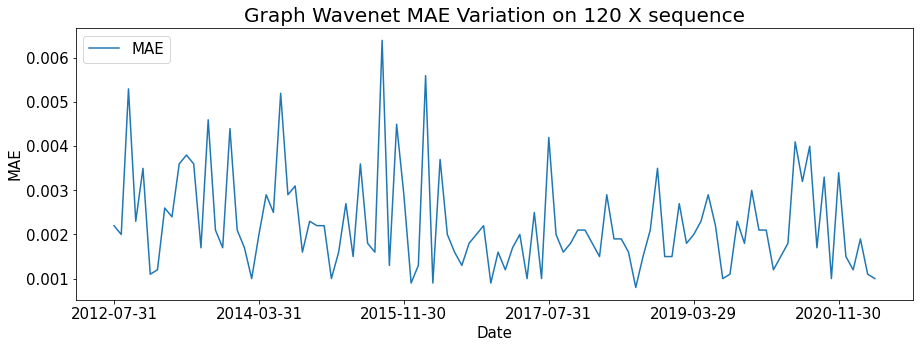

In [39]:
plt.figure(figsize = (15,5))
x_range = np.arange(0,len(result_table), 20)
plt.plot(result_table['test_loss(%)'].values/100, label = 'MAE')
plt.title("Graph Wavenet MAE Variation on 120 X sequence", fontsize = 20)
plt.ylabel("MAE", fontsize = 15)
plt.xlabel("Date",fontsize = 15)
plt.legend(loc='upper left', fontsize = 15)
plt.xticks(x_range, [last_day[i].date() for i in x_range], fontsize = 15)
plt.yticks(fontsize = 15)
plt.show()

In [53]:
np.mean(result_table['test_loss(%)'].values/100)

0.002258490566037736

No handles with labels found to put in legend.


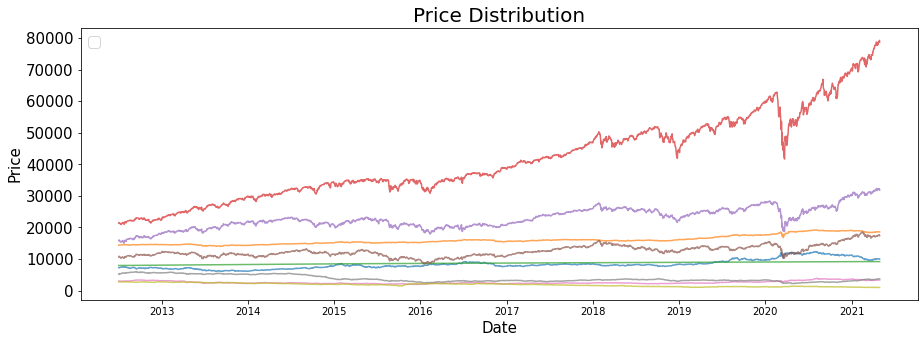

In [54]:

plt.figure(figsize = (15,5))
x_range = np.arange(0,len(result_table), 20)
plt.plot(dfy.loc[first_day[0]:last_day[-1]], alpha = 0.7)
plt.title("Price Distribution", fontsize = 20)
plt.ylabel("Price", fontsize = 15)
plt.xlabel("Date",fontsize = 15)
plt.legend(loc='upper left', fontsize = 15)
# plt.xticks(x_range, [last_day[i].date() for i in x_range], fontsize = 15)
plt.yticks(fontsize = 15)
plt.show()

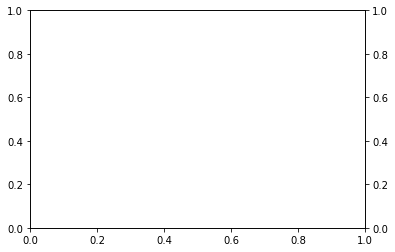

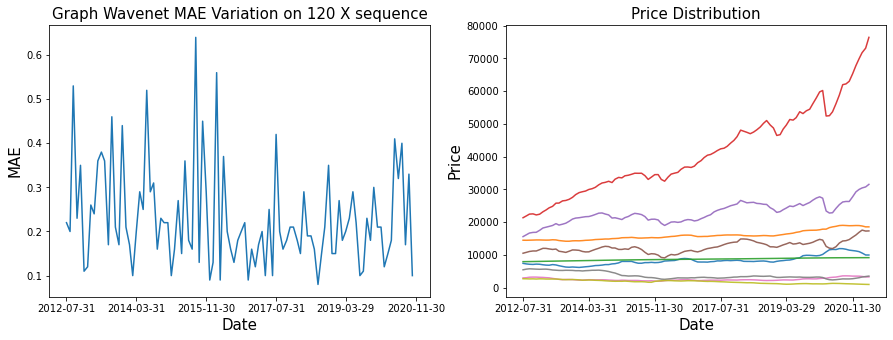

<Figure size 1440x360 with 0 Axes>

In [86]:
fig, ax1 = plt.subplots()
ax2 = ax1.twinx()

f = plt.figure(figsize=(15,5))
ax1 = f.add_subplot(121)
ax2 = f.add_subplot(122)

plt.figure(figsize=(20,5))
x_range = np.arange(0,len(result_table), 20)
ax1.plot(result_table['test_loss(%)'].iloc[0:100], label = 'MAE')
ax2.plot(dfy_rolling.loc[dfy_rolling.index.intersection(last_day)], label = 'Price', alpha = 0.9)

ax1.set_title("Graph Wavenet MAE Variation on 120 X sequence", fontsize = 15)
ax2.set_title("Price Distribution", fontsize = 15)

ax1.set_ylabel("MAE", fontsize = 15)
ax2.set_ylabel("Price", fontsize = 15)

ax1.set_xlabel("Date", fontsize = 15)
ax2.set_xlabel("Date", fontsize = 15)
# ax1.set_xticks([last_day[i].date() for i in x_range], minor = True)


ax1.xaxis.set_major_formatter(xfmt)
ax1.set_xticks([last_day[i].date() for i in x_range])

ax2.xaxis.set_major_formatter(xfmt)
ax2.set_xticks([last_day[i].date() for i in x_range])


# ax2.set_xticks([last_day[i].date() for i in x_range])


# plt.xlabel("Date",fontsize = 15)
# plt.legend(loc='upper left', fontsize = 15)
# ax1.set_xticks(x_range, [last_day[i].date() for i in x_range], fontsize = 15)
# ax1.yticks(fontsize = 15)
plt.show()

In [112]:
pred_w_arr = np.array([np.array(x) for x in result_table['pred_w'].values])

In [122]:
Y_col

['TLT_Y',
 'AGG_Y',
 'Cash_Y',
 'SPY_Y',
 'EFA_Y',
 'VWO_Y',
 'GLD_Y',
 'DBC_Y',
 'EMB_Y']

In [125]:
result_table['pred_w']

2012-07-31    [0.23163259, 0.25650775, 0.24949197, 0.1654330...
2012-08-31    [0.22930677, 0.2542798, 0.24872234, 0.16248593...
2012-09-28    [0.24000756, 0.25287998, 0.25555077, 0.1591166...
2012-10-31    [0.23022807, 0.2535389, 0.25231636, 0.16618416...
2012-11-30    [0.23054746, 0.2441862, 0.25008404, 0.15182294...
                                    ...                        
2020-12-31    [0.23117934, 0.25178695, 0.2507895, 0.16112979...
2021-01-29    [0.23026009, 0.2507672, 0.25007644, 0.16278414...
2021-02-26    [0.22700864, 0.24689619, 0.25069168, 0.1599965...
2021-03-31    [0.22976029, 0.24888423, 0.2518866, 0.16098917...
2021-04-30    [0.23153594, 0.2505636, 0.25083715, 0.15839735...
Name: pred_w, Length: 106, dtype: object

In [134]:
np.argmax(pred_w_arr, axis=1)

array([1, 1, 2, 1, 2, 2, 2, 1, 2, 1, 1, 1, 1, 2, 2, 2, 1, 2, 1, 2, 1, 1,
       2, 1, 2, 1, 2, 1, 2, 1, 1, 1, 1, 2, 1, 1, 2, 1, 2, 1, 1, 2, 1, 1,
       1, 2, 2, 1, 1, 2, 2, 2, 1, 2, 2, 2, 2, 2, 2, 2, 1, 2, 1, 1, 1, 2,
       1, 2, 1, 2, 1, 1, 1, 2, 1, 2, 2, 2, 1, 2, 1, 2, 1, 2, 1, 1, 1, 2,
       1, 2, 2, 1, 2, 1, 2, 2, 1, 1, 2, 1, 1, 1, 1, 2, 2, 2])

In [135]:
import collections, numpy
a = np.argmax(pred_w_arr, axis=1)
collections.Counter(a)

Counter({1: 55, 2: 51})

<AxesSubplot:xlabel='Date'>

<Figure size 1080x360 with 0 Axes>

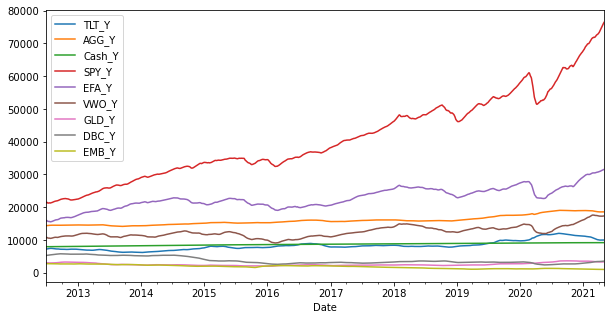

In [130]:
plt.figure(figsize = (15,5))
dfy_rolling.plot(figsize = (10,5))

In [132]:
dfy.head()

,TLT_Y,AGG_Y,Cash_Y,SPY_Y,EFA_Y,VWO_Y,GLD_Y,DBC_Y,EMB_Y
Date,,,,,,,,,
1990-12-20,1060.22,3509.748172,1559.667686,3400.033584,5499.752506,1861.6,752.832031,1394.786,3840.07261
1990-12-21,1053.94,3500.731113,1560.258223,3416.797574,5499.752506,1852.4,749.511719,1390.308,3778.07261
1990-12-24,1045.88,3490.333063,1561.998865,3400.311440,5499.752506,1835.9,749.511719,1392.098,4011.07261
1990-12-25,1045.88,3490.333063,1561.998865,3400.311440,5499.752506,1830.9,749.511719,1392.098,3798.07261
1990-12-26,1053.11,3500.406174,1563.232202,3410.314263,5499.752506,1828.3,749.511719,1414.333,3752.07261


In [111]:
np.where(pred_w_arr == np.amax(pred_w_arr)) 

(array([23]), array([1]))

In [43]:
np.mean(result_table['test_loss(%)'].values/100)

0.002258490566037736

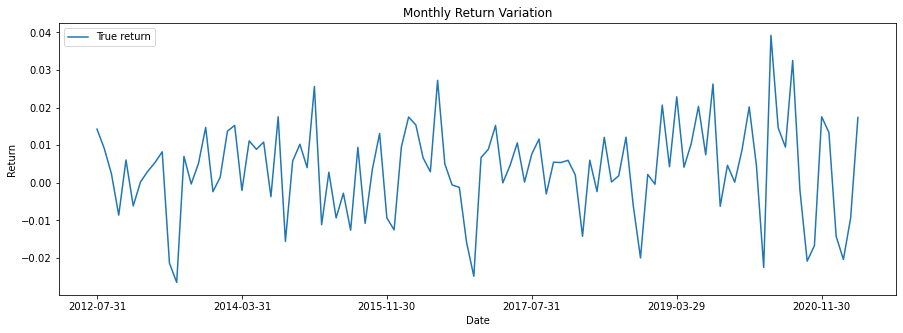

In [44]:
plt.figure(figsize = (15,5))
x_range = np.arange(0,len(result_table), 20)
plt.plot(result_table['true_mu'].values, label = 'True return')
plt.title("Monthly Return Variation")
plt.ylabel("Return")
plt.xlabel("Date")
plt.legend(loc='upper left')
plt.xticks(x_range, [last_day[i].date() for i in x_range])
plt.show()

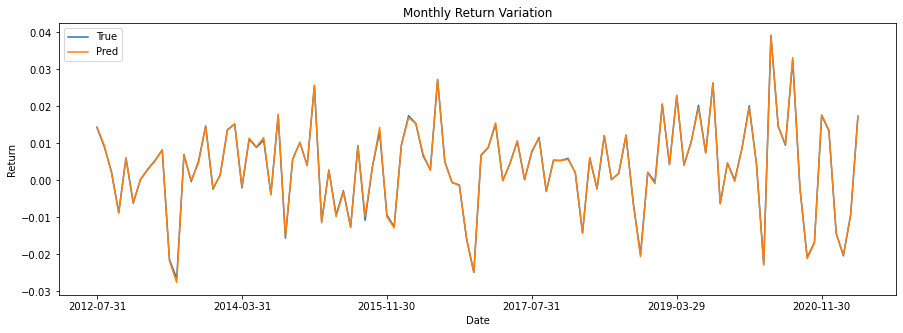

In [45]:
plt.figure(figsize = (15,5))
x_range = np.arange(0,len(result_table), 20)
plt.plot(result_table['true_mu'].values, label = 'True')
plt.plot(result_table['pred_mu'].values, label = 'Pred')
plt.title("Monthly Return Variation")
plt.ylabel("Return")
plt.xlabel("Date")
plt.legend(loc='upper left')
plt.xticks(x_range, [last_day[i].date() for i in x_range])
plt.show()

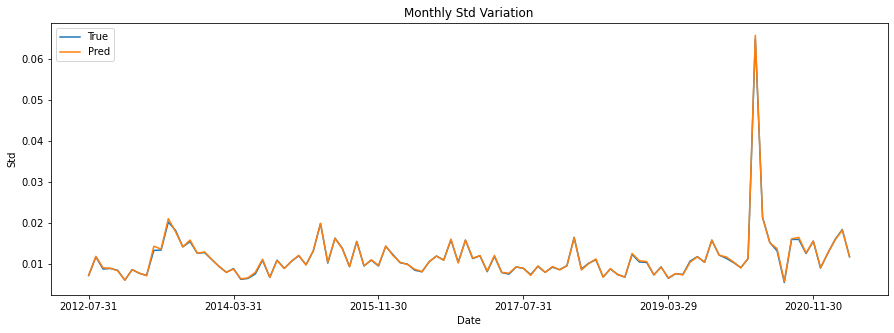

In [46]:
plt.figure(figsize = (15,5))
x_range = np.arange(0,len(result_table), 20)
plt.plot(result_table['true_sigma'].values, label = 'True')
plt.plot(result_table['pred_sigma'].values, label = 'Pred')
plt.title("Monthly Std Variation")
plt.ylabel("Std")
plt.xlabel("Date")
plt.legend(loc='upper left')
plt.xticks(x_range, [last_day[i].date() for i in x_range])
plt.show()

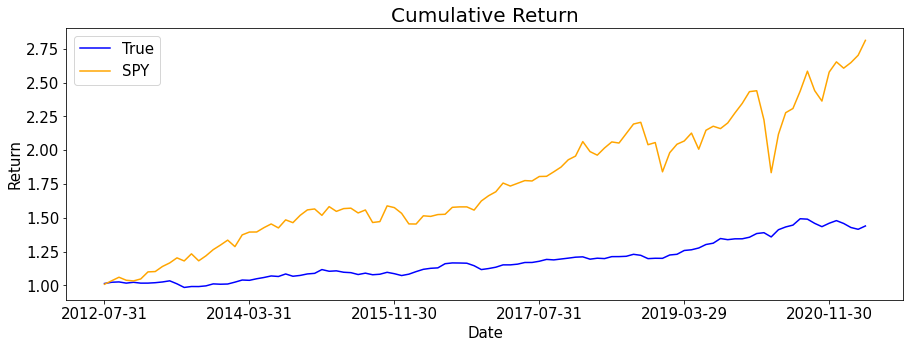

In [70]:
# cummulative product
plt.figure(figsize = (15,5))
x_range = np.arange(0,len(result_table), 20)
plt.plot((1+result_table['true_mu']).cumprod().values, label = 'True', color = 'blue')
plt.plot((1+pd.DataFrame.from_dict(spy_dict)['spy_mu_month']).cumprod().values, label = 'SPY', color = 'orange')

plt.title("Cumulative Return", fontsize = 20)
plt.ylabel("Return",fontsize = 15)
plt.xlabel("Date",fontsize = 15)
plt.legend(loc='upper left',fontsize = 15)
plt.xticks(x_range, [last_day[i].date() for i in x_range], fontsize = 15)
plt.yticks(fontsize = 15)
plt.show()


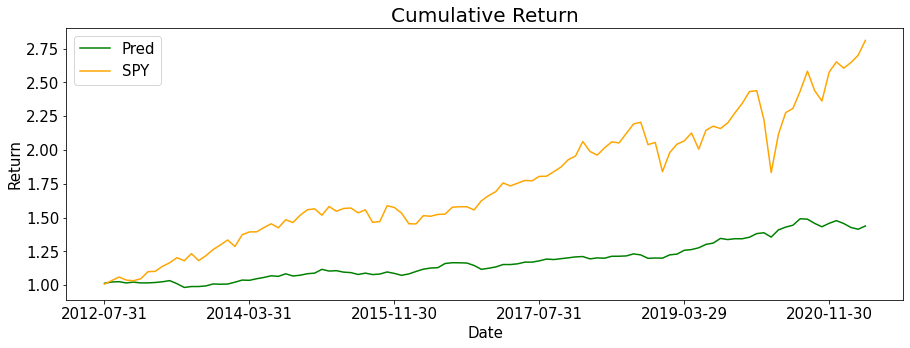

In [68]:
# cummulative product
plt.figure(figsize = (15,5))
x_range = np.arange(0,len(result_table), 20)
plt.plot((1+result_table['pred_mu']).cumprod().values, label = 'Pred', color = 'g')
plt.plot((1+pd.DataFrame.from_dict(spy_dict)['spy_mu_month']).cumprod().values, label = 'SPY', color = 'orange')

plt.title("Cumulative Return", fontsize = 20)
plt.ylabel("Return",fontsize = 15)
plt.xlabel("Date",fontsize = 15)
plt.legend(loc='upper left',fontsize = 15)
plt.xticks(x_range, [last_day[i].date() for i in x_range], fontsize = 15)
plt.yticks(fontsize = 15)
plt.show()


In [49]:
result_table.columns

Index(['Date', 'X_date', 'pred_w', 'pred_mu', 'pred_sigma', 'true_w',
       'true_mu', 'true_sigma', 'test_loss(%)'],
      dtype='object')

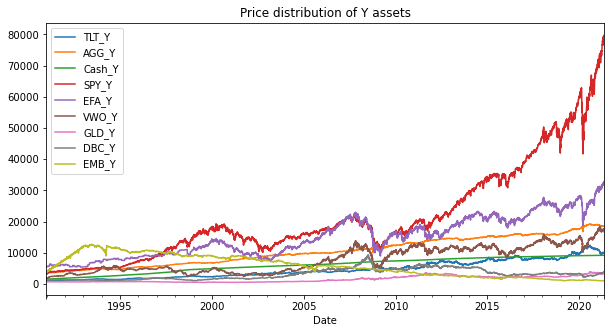

In [139]:

(dfy).plot(figsize = (10,5))
plt.title("Price distribution of Y assets")
plt.show()